<a href="https://colab.research.google.com/github/vkjadon/sklearn/blob/main/Ex6-makeCircleCompare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
data, target = datasets.make_circles(n_samples=1000, random_state=100, noise=0.02)
# Split into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=False)
print(X_train.shape)

(800, 2)


In [4]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=2000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [5]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [6]:
# Support Vector Classifier
from sklearn.svm import SVC
svm = SVC(gamma='scale', C=1.0, random_state=101)

In [7]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10,random_state=101, max_features=None,min_samples_leaf=5)

In [8]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=1, random_state=101,max_features=None,min_samples_leaf=3)

In [9]:
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [10]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101, tol=1e-3,max_iter=1000)

In [11]:
# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=200,activation='relu',hidden_layer_sizes=(10,30,10),random_state=1, shuffle=True)

In [12]:
# classification methods
m = [nb,lr,sgd,knn,dtree,rfm,svm,nn]
s = ['nb','lr','sgd','knn','dt','rfm','svm','nn']

In [13]:
# fit classifiers
print('Train Classifiers')
for i,x in enumerate(m):
    st = time.time()
    x.fit(X_train,y_train)
    tf = str(round(time.time()-st,5))
    print(s[i] + ' time: ' + tf)

Train Classifiers
nb time: 0.00174
lr time: 0.0072
sgd time: 0.00784
knn time: 0.00131
dt time: 0.00282
rfm time: 0.17961
svm time: 0.01505
nn time: 0.17066


In [ ]:
# test on random number in second half of data
n = np.random.randint(int(n_samples/2),n_samples)
Xt = digits.data[n:n+1]

Test Classifiers
nb predicts: 5 time: 0.00359
lr predicts: 5 time: 0.00032
sgd predicts: 5 time: 0.00024
knn predicts: 5 time: 0.00633
dt predicts: 5 time: 0.00049
rfm predicts: 5 time: 0.00981
svm predicts: 5 time: 0.00049
nn predicts: 5 time: 0.00032
Label: 5


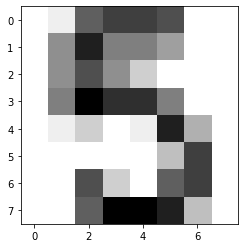

In [ ]:
# test classifiers
print('Test Classifiers')
for i,x in enumerate(m):
    st = time.time()
    yt = x.predict(Xt)
    tf = str(round(time.time()-st,5))
    print(s[i] + ' predicts: ' + str(yt[0]) + ' time: ' + tf)
print('Label: ' + str(digits.target[n:n+1][0]))

plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
